# Challenge problem 5

In [1]:
  import warnings 
  warnings.filterwarnings('ignore')
  import networkx as nx
  import matplotlib.pyplot as plt


In [2]:
# Generate the Dutch windmill graph D(m)
# This uses a dictionary representation. 

def windmill(m):
    # Start by letting 0 be the common node in the "center"
    # and connecting it to all the other nodes. 
    # This uses a "list comprehension".  
    dw = {0:[i for i in range(1,2*m+1)]}
    
    # Now connect 2 to 0 and 1, 4 to 0 and 3, 6 to 0 and 5, etc.
    for i in range(1,m+1):
        dw[2*i] = [0, 2*i-1]
        
    # Define the graph object and return it. 
    return nx.Graph(dw)

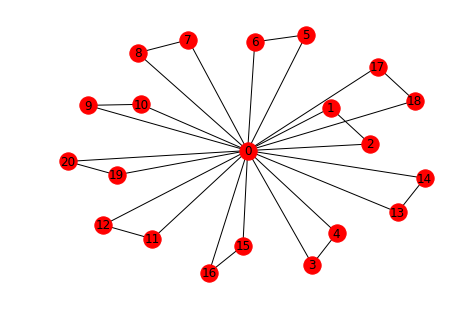

In [3]:
nx.draw(windmill(10), with_labels=True)
plt.show()

# Part 1 - finding a pattern

#### iterate!
I quickly created a function to print off the clustering values for a range of windmills in order for me to easily see the transition in values as the degree of the windmill increased

In [116]:
def make_windmills(num):
    wm = []
    for i in range(1,num):
        total = 0
        clustering = nx.clustering(windmill(i))
        counter = 0
        print("--------")
        for key in clustering:
            print(clustering[key])
            counter += 1
            total += clustering[key]
        wm.append(total / counter)
    return wm

In [117]:
iterations = 21

In [118]:
wm = make_windmills(iterations)

--------
1.0
1.0
1.0
--------
0.3333333333333333
1.0
1.0
1.0
1.0
--------
0.2
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.14285714285714285
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.1111111111111111
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.09090909090909091
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.07692307692307693
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.06666666666666667
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.058823529411764705
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.05263157894736842
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.047619047619047616
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.043478260869565216
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
--------
0.04
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1

#### print it out
Lets see what the values from 1-20 are

In [112]:
for i in wm:
    print(i)

1.0
0.8666666666666666
0.8857142857142858
0.9047619047619047
0.9191919191919191
0.93006993006993
0.9384615384615385
0.9450980392156862
0.9504643962848297
0.9548872180451129
0.9585921325051759
0.9617391304347827
0.9644444444444444
0.9667943805874841
0.9688542825361514
0.9706744868035191
0.9722943722943723
0.9737451737451737
0.9750519750519752
0.9762351469668542


#### well it's clearly not linear
nor is it exponential, lets see what the change between each value is by percentile

In [119]:
for index, value in enumerate(wm):
    if index+1 != len(wm):
        print (wm[index+1] / value)

0.8666666666666666
1.0219780219780221
1.0215053763440858
1.0159489633173844
1.0118343195266273
1.0090225563909776
1.007071681131469
1.005678095654073
1.0046533271288973
1.0038799497888848
1.003282937365011
1.0028129395218002
1.0024365697335664
1.0021306515532449
1.0018787182966287
1.0016688246295498
1.0014921421867102
1.0013420362349785
1.0012134449702703


# Part 2 - A pattern
#### See a pattern?
I know 0.333 is 1/3 and 0.2 is 1/5 from our original print out it looks like we end up adding 1 / 3, 1 /5, 1 / 7 etc with increasingly more values of 1. This makes sense since every outside node will always have a clustering coefficient of 1, and will increase in number by two, while the middle node will get a lower clustering value over time. The example below demonstrates the clustering coefficient of node 0 through each iteration

In [122]:
temp_list = []
for i in range(0,iterations):
    curr = 1 / (i*2 + 1)
    temp_list.append(curr)
    print(curr)

1.0
0.3333333333333333
0.2
0.14285714285714285
0.1111111111111111
0.09090909090909091
0.07692307692307693
0.06666666666666667
0.058823529411764705
0.05263157894736842
0.047619047619047616
0.043478260869565216
0.04
0.037037037037037035
0.034482758620689655
0.03225806451612903
0.030303030303030304
0.02857142857142857
0.02702702702702703
0.02564102564102564
0.024390243902439025


#### Voila
It would appear that the pattern extrapolates further than just the first few values! This also makes a lot of sense, because we're starting with 1 node and then adding two each time. The value of the center node follows the above cell, the value of the outside nodes are each one and there are i\*2 nodes. So if we take the clustering coefficient, plus the number of surrounding nodes, and divide it by the total number of nodes that should give us our clustering coefficient of the overall graph


In [131]:
for i in range(1,iterations):
    central_node_value = temp_list[i-1]
    num_outside_nodes = i*2
    print((central_node_value + num_outside_nodes) / (num_outside_nodes + 1))

1.0
0.8666666666666666
0.8857142857142858
0.9047619047619047
0.9191919191919191
0.9300699300699301
0.9384615384615385
0.9450980392156862
0.9504643962848297
0.9548872180451129
0.9585921325051759
0.9617391304347827
0.9644444444444444
0.9667943805874841
0.9688542825361514
0.9706744868035191
0.9722943722943723
0.9737451737451739
0.9750519750519749
0.9762351469668543


# Part 3 - Mathematical conjecture
It seems the thought experiment fits the data well, lets translate this into a mathematical conjecture.

For all positive integers $n$, the clustering coefficient $D_n = \frac{\frac{1}{n}+2n}{2n+1}$

# Part 4 - Proof

#### base case
let n = 1, $D_n = \frac{\frac{1}{n}+2n}{2n+1}$ = 1

which is true

#### inductive step
Assume $D_k = \frac{\frac{1}{k}+2k}{2k+1}$ is true

#### we need to prove
$D_{k+1} = \frac{\frac{1}{k+1}+2(k+1)}{2(k+1)+1}$

#### lets get there logically
$D_{K+1} = \frac{\frac{1}{k}+2k}{2k+1}$